In [1]:
%matplotlib inline

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Load in CSV
pyber_ride_df =pd.read_csv("Resources/PyBer_ride_data.csv")

In [3]:
%who

np	 pd	 plt	 pyber_ride_df	 


In [4]:
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


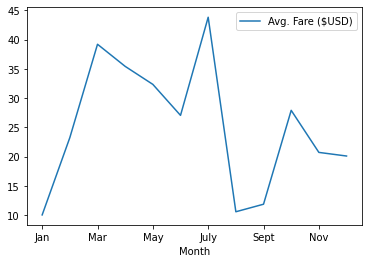

In [5]:
pyber_ride_df.plot(x="Month",y = "Avg. Fare ($USD)")
plt.show()

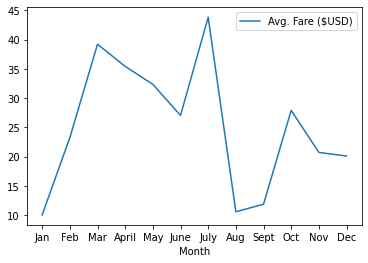

In [6]:
#Set x-axis and tick location
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]

#Plot the data
pyber_ride_df.plot(x="Month", y = "Avg. Fare ($USD)") 
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

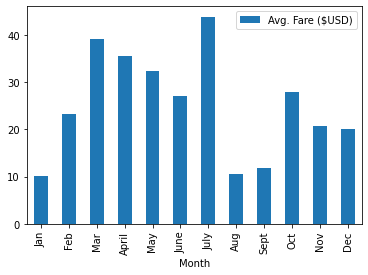

In [7]:
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
plt.show()

# pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
# plt.show()

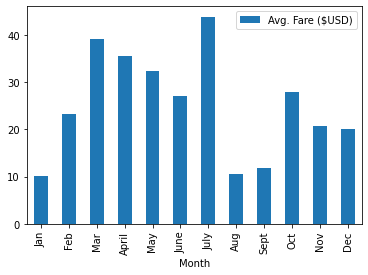

In [8]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind ='bar')
plt.show()

In [9]:
import statistics
y_axis = [10.02, 23.24, 39.20, 35.42, 32.34, 27.04, 43.82, 10.56, 11.85, 27.90, 20.71, 20.09]
stdev = statistics.stdev(y_axis)
stdev

11.208367917035753

<BarContainer object of 12 artists>

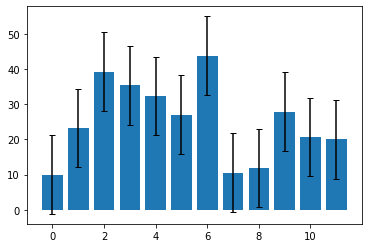

In [10]:
plt.bar(x_axis, y_axis, yerr=stdev, capsize=3)

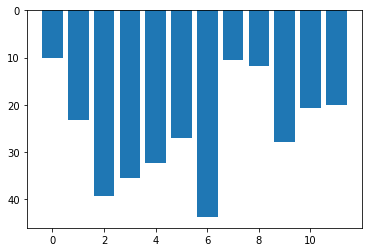

In [11]:
plt.bar(x_axis, y_axis) 
plt.gca().invert_yaxis()

In [12]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [13]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [14]:
#Read the ride data file and store in a df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


In [15]:
#Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
# Get the columns and the rows that are not null. (Same as above)
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [17]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [18]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [19]:
# Get the number of data points from the Urban cities .
sum(city_data_df["type"]=="Urban")


66

In [20]:
#number of data points from Suburban
sum(city_data_df["type"]=="Suburban")


36

In [21]:
#number of data points from Rural
sum(city_data_df["type"]=="Rural")

18

In [22]:
# Get the columns and the rows that are not null.Ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [23]:
#not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [24]:
#Find data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [25]:
#Merge data frames using this syntax : new_df = pd.merge(leftdf, rightdf, how=mergetype, on=["columnname left","columnname right"'])
pyber_data_df = pd.merge( ride_data_df,city_data_df, how="left", on= ["city","city"])

#Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [26]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [27]:
# Create the suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [28]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [29]:
#Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [30]:
#Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()


city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [31]:
#Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()


city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [32]:
#Get the average city fare for urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [33]:
#Get the average city fare for suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [34]:
#Get the average city fare for rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [35]:
#Get the average number of drivers for urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [36]:
#Get the average number of drivers for suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [37]:
#Get the average number of drivers for rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

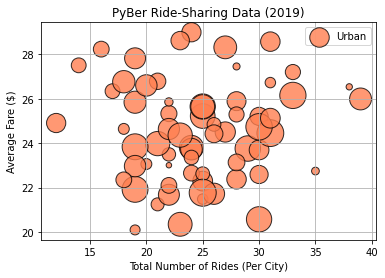

In [38]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

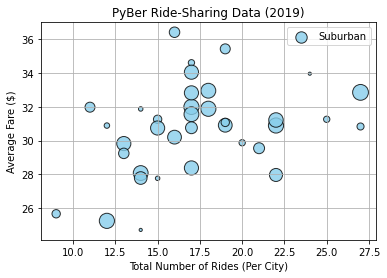

In [39]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

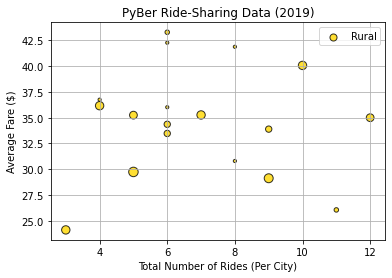

In [40]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

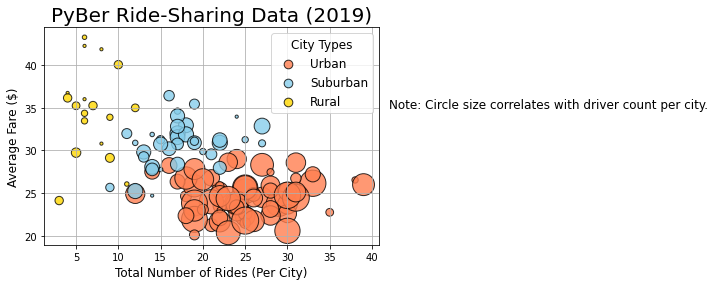

In [41]:
#Add the scatter chars for each type of city. 

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [42]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [43]:
# Get summary statistics.
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [44]:
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [45]:
# Get summary statistics.

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [46]:
# Get summary statistics.

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [47]:
# Get summary statistics.

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [49]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [50]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(),suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [51]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
#Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [52]:
#Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [53]:
#Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [54]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [55]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [56]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [57]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [58]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [59]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [60]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [61]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of urban drivers is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of urban drivers is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of urban drivers is {mode_urban_drivers}.")

The mean number of urban drivers is 36.68.
The median number of urban drivers is 37.00.
The mode number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [62]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [63]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of suburban drivers is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of suburban drivers is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of suburban drivers is {mode_suburban_drivers}.")

The mean number of suburban drivers is 13.71.
The median number of suburban drivers is 16.00.
The mode number of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [64]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [65]:
# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of rural drivers is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of rural drivers is {mode_rural_drivers}.")

The mean number of rural drivers is 4.30.
The median number of rural drivers is 4.00.
The mode number of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


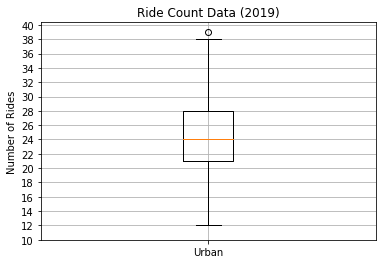

In [66]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

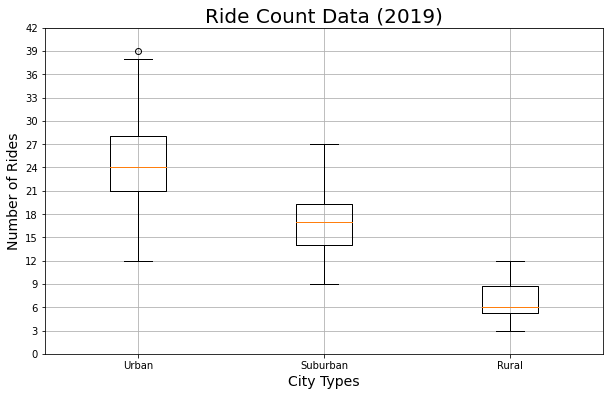

In [67]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [68]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


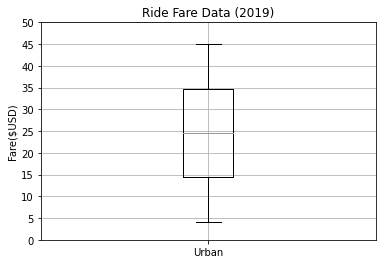

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [69]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

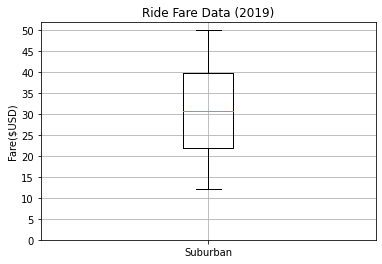

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [70]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

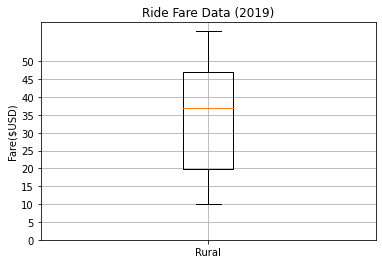

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [71]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

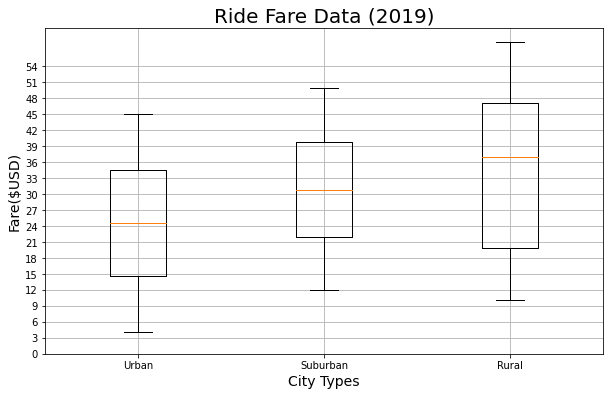

In [72]:
# Create a box-and-whisker plot for all three city types fare data.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 56, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()



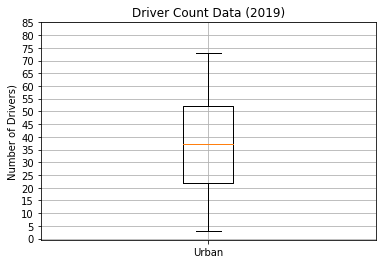

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [73]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

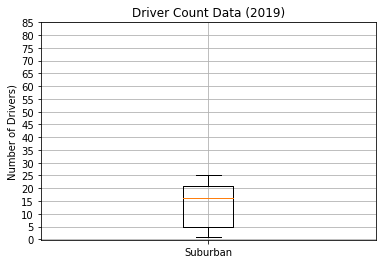

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [74]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

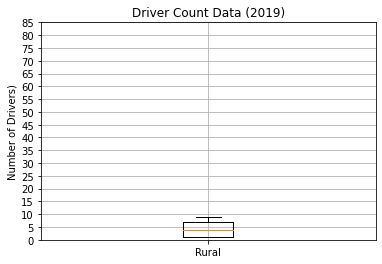

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [75]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

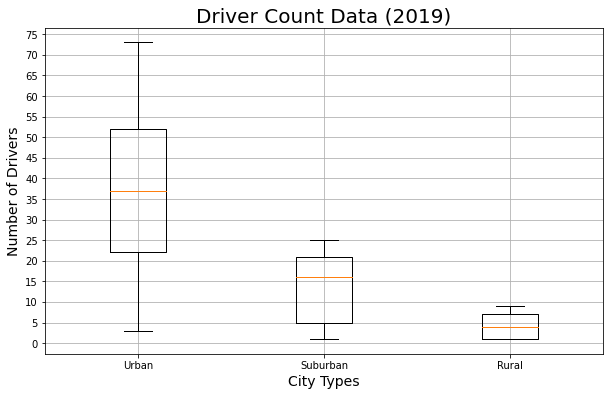

In [76]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [77]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [78]:
#get the sum of all the fares
total_fares= pyber_data_df["fare"].sum()
total_fares

63538.64

In [79]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [80]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

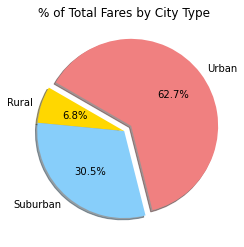

In [81]:

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save Figure
plt.savefig('analysis/Fig5.png')

#show figure

plt.show()


In [82]:
# Calculate the percentage of total rides for each city type.
ride_percents = 100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

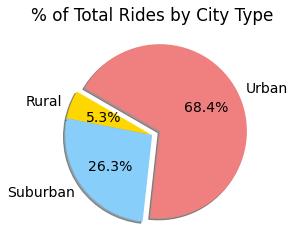

In [83]:
# Build the percentage of rides by city type pie chart.
plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save Figure
plt.savefig('analysis/Fig6.png')

#show figure

plt.show()

In [85]:
# Calculate the percentage of total rides for each city type.
driver_percents = 100* city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [ ]:
plt.pie(driver_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#save Figure
plt.savefig('analysis/Fig7.png')

#show figure

plt.show()